<a href="https://colab.research.google.com/github/man0ZZZ/topiDhunga/blob/main/tdp_datahandling_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# file handling



In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
##file handling
set_dir = '/content/drive/MyDrive/BDS/TDP'
os.chdir(set_dir)
datasets_dir=os.path.abspath('./datasets')
all_datasets=os.listdir(datasets_dir)

In [3]:
all_datasets.sort()
all_datasets
##data set 13 and 7 have two files, we will concat two files as they are the data from individual experiment

['C11.csv',
 'C13-1.csv',
 'C13-2.csv',
 'C14.csv',
 'C15.csv',
 'C16.csv',
 'C7-1.csv',
 'C7-2.csv',
 'C8.csv',
 'C9.csv']

In [4]:
all_datasets_path=[]
for i in all_datasets:
  all_datasets_path.append(os.path.join(datasets_dir,i))

In [5]:
all_datasets_path[0]

'/content/drive/MyDrive/BDS/TDP/datasets/C11.csv'

In [6]:
datasets_df=[pd.read_csv(f) for f in all_datasets_path]
datasets_df[0].head(10)

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,-45.568737,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,-51.259983,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,-56.656587,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,-52.903776,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,-56.377452,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0
5,5,-95.641610,-52.914129,-24.963793,-35.474989,-33.419110,-35.580328,-33.342367,-35.592110,-53.973792,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.336295,-96.082302,-67.704494,-100.0,-100.0,-100.0
6,6,-99.422931,-79.731577,-24.979038,-35.658559,-33.513916,-35.501639,-33.383021,-35.618324,-54.609599,...,-98.610796,-77.922564,-80.784439,-93.639475,-26.154242,-97.555235,-64.818446,-100.0,-100.0,-100.0
7,7,-99.422931,-79.731577,-25.161979,-35.501213,-33.378479,-35.475410,-33.355918,-56.982764,-54.547569,...,-98.610796,-77.922564,-80.784439,-93.625214,-25.438393,-97.555235,-61.101090,-100.0,-100.0,-100.0
8,8,-96.977980,-54.405368,-25.100999,-35.474989,-33.513916,-35.672131,-33.396572,-57.113834,-52.035357,...,-98.610796,-77.922564,-80.784439,-93.297205,-23.641045,-97.281907,-68.661281,-100.0,-100.0,-100.0
9,9,-96.977980,-54.405368,-25.024773,-35.684783,-33.405566,-35.436066,-33.369469,-57.022085,-56.082810,...,-98.610796,-77.922564,-80.784439,-93.568169,-25.330243,-97.281907,-64.128304,-100.0,-100.0,-100.0


In [7]:
##data set 13 and 7 have two files, we will concat two files as they are the data from individual experiment
#notice two files for C7 (index:6&7) and C13(index:1&2) run to failure exp
#concat the two data files
# datasets_df[6]=pd.concat([datasets_df[6],datasets_df[7]])
# datasets_df[1]=pd.concat([datasets_df[1],datasets_df[2]])
datasets=[]
for f in range(len(datasets_df)):
  if f==1 or f==6:
    datasets.append(pd.concat([datasets_df[f],datasets_df[f+1]]))
  else:
    datasets.append((datasets_df[f]))

##delete the C7-2 and C13_2 files:
ind=[2,7]
datasets=[datasets[i] for i in range(len(datasets)) if i not in ind]
print(len(datasets)) ## 8 datasets from 8 run-to-failure experiment

8


In [8]:
#reser timestamp columns values
for i,data in enumerate(datasets):
  data.reset_index(drop=True, inplace=True)
  data['Timestamp']=list(range(data.shape[0]))

In [9]:
datasets[5]['Timestamp']

0            0
1            1
2            2
3            3
4            4
         ...  
51666    51666
51667    51667
51668    51668
51669    51669
51670    51670
Name: Timestamp, Length: 51671, dtype: int64

#handling missing data

In [10]:
for i,data in enumerate(datasets):
  print(data.isna().sum())

Timestamp    0
L_1          0
L_2          0
A_1          0
A_2          0
B_1          0
B_2          0
C_1          0
C_2          0
A_3          0
A_4          0
B_3          0
B_4          0
C_3          0
C_4          0
L_3          0
L_4          0
L_5          0
L_6          0
L_7          0
L_8          0
L_9          0
L_10         0
A_5          0
B_5          0
C_5          0
dtype: int64
Timestamp    0
L_1          0
L_2          0
A_1          0
A_2          0
B_1          0
B_2          0
C_1          0
C_2          0
A_3          0
A_4          0
B_3          0
B_4          0
C_3          0
C_4          0
L_3          0
L_4          0
L_5          0
L_6          0
L_7          0
L_8          0
L_9          0
L_10         0
A_5          0
B_5          0
C_5          0
dtype: int64
Timestamp    0
L_1          4
L_2          4
A_1          4
A_2          4
B_1          4
B_2          4
C_1          4
C_2          4
A_3          4
A_4          4
B_3          4
B_4          4

In [11]:
##replace missing data with mean from each columns
for i, data in enumerate(datasets):
  for j in list(data.columns):
    data[j].fillna(data[j].mean(), inplace=True)

#EDA

##correlation between features

In [12]:
correlation_matrix=[]
for i,data in enumerate(datasets):
  correlation_matrix.append(data.iloc[:,1:].corr())

In [13]:
import seaborn as sb
def corr_matrix_plot(dataset_no):
  plt.figure(figsize=(8, 6))
  sb.heatmap(correlation_matrix[dataset_no], annot=False, cmap='coolwarm', center=0)
  plt.title("Correlation Matrix")
  plt.show()

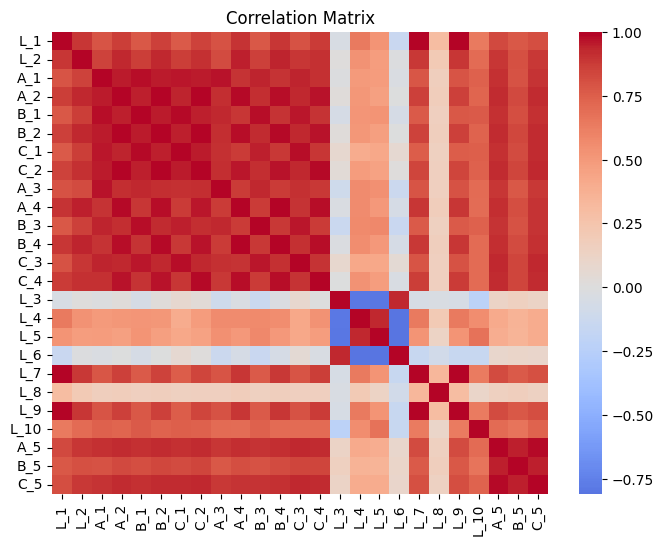

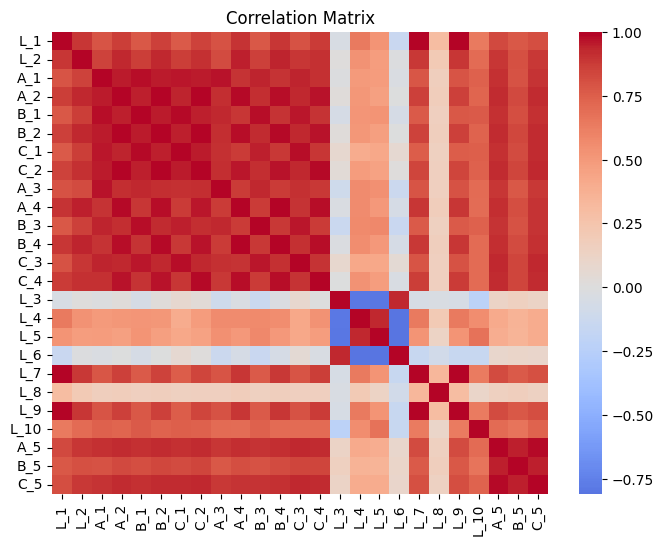

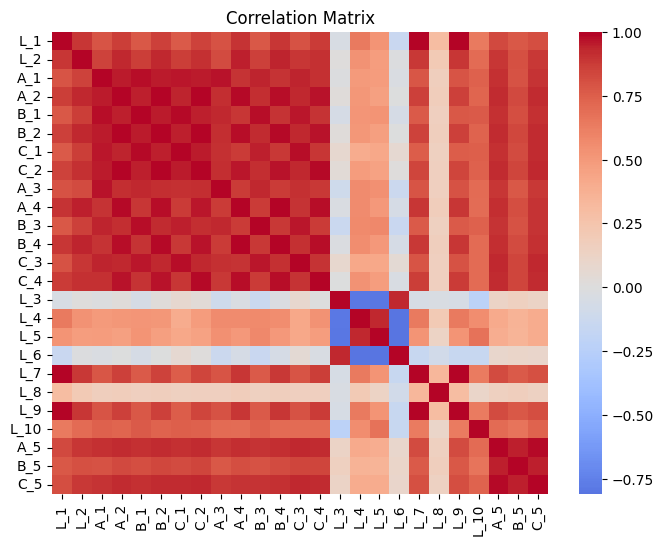

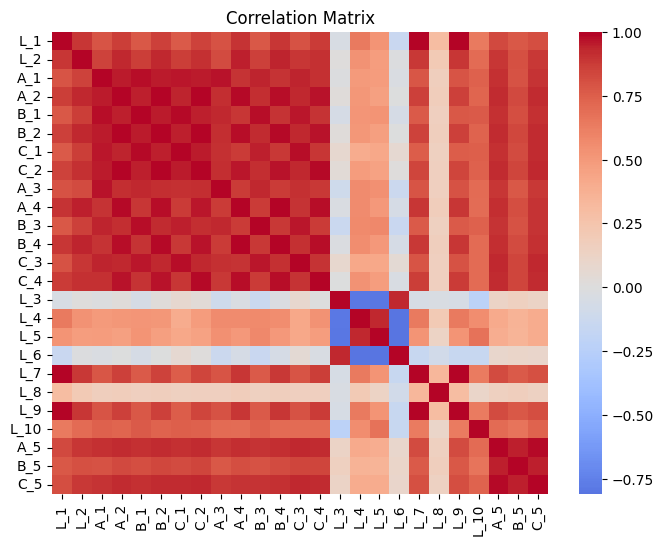

In [14]:
for i in range(4):
  corr_matrix_plot(3)

In [15]:
#get the top 8 correlated features
# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix[0].where(np.triu(np.ones(correlation_matrix[0].shape), k=1).astype(np.bool))

# Get the top 8 absolute correlation values
top_correlation_values = upper_triangle.unstack().abs().sort_values(ascending=False)[:8]

# Extract the corresponding feature pairs
top_feature_pairs = [(pair[0], pair[1]) for pair in top_correlation_values.index]

# print("Top 8 correlation values:")
# print(top_correlation_values)

print("\nTop correlated feature pairs:")
for feature_pair in top_feature_pairs:
    print(feature_pair)


Top correlated feature pairs:
('L_9', 'L_7')
('L_9', 'L_1')
('L_7', 'L_1')
('B_2', 'A_2')
('C_2', 'B_2')
('B_4', 'B_2')
('C_5', 'A_5')
('A_4', 'A_2')


<ipython-input-15-e62868d4d67e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix[0].where(np.triu(np.ones(correlation_matrix[0].shape), k=1).astype(np.bool))


In [16]:
#get the top 8 correlated features
# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix[1].where(np.triu(np.ones(correlation_matrix[1].shape), k=1).astype(np.bool))

# Get the top 8 absolute correlation values
top_correlation_values = upper_triangle.unstack().abs().sort_values(ascending=False)[:8]

# Extract the corresponding feature pairs
top_feature_pairs = [(pair[0], pair[1]) for pair in top_correlation_values.index]

# print("Top 8 correlation values:")
# print(top_correlation_values)

print("\nTop correlated feature pairs:")
for feature_pair in top_feature_pairs:
    print(feature_pair)


Top correlated feature pairs:
('L_9', 'L_1')
('L_9', 'L_7')
('B_2', 'A_2')
('L_7', 'L_1')
('B_4', 'A_4')
('C_2', 'B_2')
('C_2', 'A_2')
('C_4', 'B_4')


<ipython-input-16-e4928a722898>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix[1].where(np.triu(np.ones(correlation_matrix[1].shape), k=1).astype(np.bool))


In [17]:
#get the top 8 correlated features
# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix[2].where(np.triu(np.ones(correlation_matrix[2].shape), k=1).astype(np.bool))

# Get the top 8 absolute correlation values
top_correlation_values = upper_triangle.unstack().abs().sort_values(ascending=False)[:8]

# Extract the corresponding feature pairs
top_feature_pairs = [(pair[0], pair[1]) for pair in top_correlation_values.index]

# print("Top 8 correlation values:")
# print(top_correlation_values)

print("\nTop correlated feature pairs:")
for feature_pair in top_feature_pairs:
    print(feature_pair)


Top correlated feature pairs:
('L_9', 'L_1')
('B_2', 'A_2')
('L_9', 'L_7')
('L_7', 'L_1')
('B_4', 'A_4')
('C_2', 'B_2')
('C_2', 'A_2')
('C_4', 'B_4')


<ipython-input-17-9c48451d1723>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix[2].where(np.triu(np.ones(correlation_matrix[2].shape), k=1).astype(np.bool))


In [18]:
##least correlated features better explains the variation of the dataset
def least_corr_features(dataset_no,no_of_feature_pair):
  ##least correlated features better explains the variation of the dataset
  #get the top 8 correlated features
  # Get the upper triangle of the correlation matrix (excluding the diagonal)
  upper_triangle = correlation_matrix[dataset_no].where(np.triu(np.ones(correlation_matrix[dataset_no].shape), k=1).astype(np.bool))

  # Get the top 8 absolute correlation values
  least_correlation_values = upper_triangle.unstack().abs().sort_values(ascending=True)[:no_of_feature_pair]

  # Extract the corresponding feature pairs
  low_feature_pairs = [(pair[0], pair[1]) for pair in least_correlation_values.index]

  # print("Top 8 correlation values:")
  # print(top_correlation_values)

  print("\nLeast correlated feature pairs:")
  for feature_pair in low_feature_pairs:
      print(feature_pair)

In [19]:
least_corr_features(0,8)


Least correlated feature pairs:
('L_10', 'L_6')
('L_6', 'L_2')
('L_6', 'A_4')
('L_8', 'C_1')
('L_6', 'A_2')
('L_3', 'L_2')
('C_5', 'L_8')
('L_6', 'L_1')


<ipython-input-18-8e22cec57c26>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix[dataset_no].where(np.triu(np.ones(correlation_matrix[dataset_no].shape), k=1).astype(np.bool))


In [20]:
least_corr_features(1,8)


Least correlated feature pairs:
('L_6', 'A_3')
('L_6', 'A_4')
('L_10', 'L_8')
('L_6', 'B_4')
('C_5', 'L_8')
('L_7', 'L_3')
('L_9', 'L_3')
('L_8', 'B_3')


<ipython-input-18-8e22cec57c26>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix[dataset_no].where(np.triu(np.ones(correlation_matrix[dataset_no].shape), k=1).astype(np.bool))


##covariance matrix

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i, data in enumerate(datasets):
  scaled_df=ss.fit_transform(data.iloc[:,1:])
  cov_df=pd.DataFrame(scaled_df).cov()
  print('========= cov matrix for dataset ',i,'==========')
  print(cov_df)

=========cov matrix for dataset  0 ==========
          0         1         2         3         4         5         6   \
0   1.000054  0.936277  0.821572  0.880413  0.782805  0.888174  0.783099   
1   0.936277  1.000054  0.911941  0.944608  0.873968  0.936985  0.880902   
2   0.821572  0.911941  1.000054  0.968186  0.976478  0.959647  0.958926   
3   0.880413  0.944608  0.968186  1.000054  0.931426  0.990811  0.933374   
4   0.782805  0.873968  0.976478  0.931426  1.000054  0.943388  0.977375   
5   0.888174  0.936985  0.959647  0.990811  0.943388  1.000054  0.949124   
6   0.783099  0.880902  0.958926  0.933374  0.977375  0.949124  1.000054   
7   0.880128  0.930597  0.938485  0.969821  0.929728  0.983939  0.948828   
8   0.846139  0.926336  0.978364  0.950466  0.941859  0.936011  0.920861   
9   0.899112  0.947781  0.915806  0.979679  0.862603  0.962786  0.870627   
10  0.774373  0.863373  0.947697  0.894534  0.978168  0.903977  0.945097   
11  0.919662  0.939423  0.911475  0.972660